In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn as sk
print(sk.__version__)

0.24.2


In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 0.24.2
Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# doc du lieu Iris
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Building_A_Web_App_For_Decision_Model/iris.csv')

In [ ]:
# Kiem tra head
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# kiem tra sum rows and columns
dataset.shape

(150, 5)

In [ ]:
# kiem tra thong tin du lieu
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Kiem tra description
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Kiem tra null trong tap du lieu Iris
dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
#dataset.dropna(subset = ['variety'], inplace=True)
print(dataset)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
# kiểm tra số lượng các loài khác nhau trong tập dữ liệu Iris
dataset['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


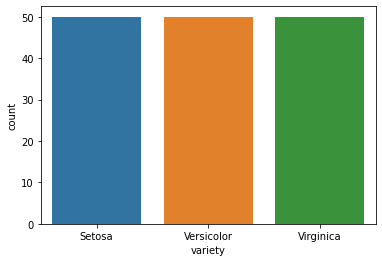

In [ ]:
sns.countplot(dataset['variety'])

In [ ]:
dataset['variety'] = dataset['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

In [ ]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


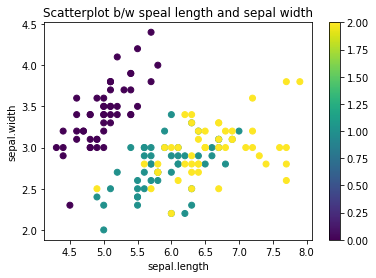

In [ ]:
##Bieu do scatter chieu dai va chieu rong sepal
plt.scatter(dataset['sepal.length'],dataset['sepal.width'],c=dataset['variety'])
plt.colorbar()
plt.title('Scatterplot b/w speal length and sepal width')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.show()

In [ ]:
# drop 'variety'
x = dataset.drop('variety',axis=1)
y = dataset['variety']

In [ ]:
# chia thanh 2 thanh phan "training" & "test" theo ti le 70/30 and random_state= 40
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 40)

In [ ]:
# Kiem tra tong the training & test
print('Trainging shape:',x_train.shape,y_train.shape)
print('Test shape:',x_test.shape,y_test.shape)

Trainging shape: (105, 4) (105,)
Test shape: (45, 4) (45,)


In [ ]:
#Build classifier by cay quyet dinh (decision tree)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# du doan du lieu training & test
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# kiem tra do chinh xac
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train,train_predict))
print('Testing Accuracy : ', accuracy_score(y_test,test_predict))

Training Accuracy :  1.0
Testing Accuracy :  1.0


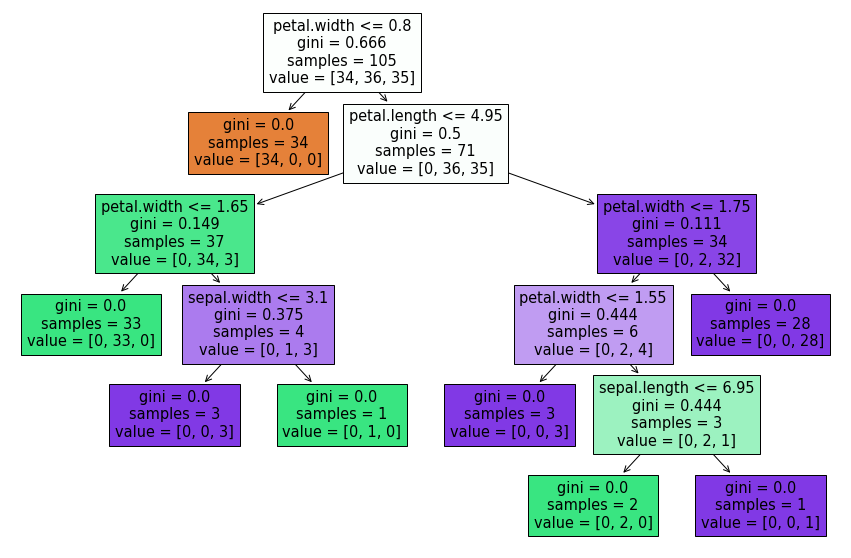

In [ ]:
# Ve cay quyet dinh
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=x.columns)
plt.savefig('Iris-Desition-Tree')
plt.show()

In [ ]:
df_importance = pd.DataFrame({'Features' : x.columns,'Importances:' : model.feature_importances_})
df_importance

,Features,Importances:
0,sepal.length,0.019053
1,sepal.width,0.021434
2,petal.length,0.374598
3,petal.width,0.584915


In [ ]:
import pickle
with open('Iris_classifier.pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
import pickle
with open("model.bin",'wb') as f_out:
  pickle.dump(model,f_out)
  f_out.close()

In [ ]:
############## LET GO ####################